<a href="https://colab.research.google.com/github/FernandoMdAraujo/PCS5024---Aprendizado-Estat-stico/blob/main/Simula%C3%A7%C3%A3o_de_Medida_de_dist%C3%A2ncia_Curva_Carcterizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Biblioteca para intepolação e cálculo de média

In [ ]:
from scipy.interpolate import interp1d
from numpy.ma.core import mean

## Curva Caracterizada

In [ ]:
x1 = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7,7.25,7.5,7.75,8,8.25,8.5,8.75,9,9.25,9.5,9.75,10,10.25,10.5,10.75]

In [ ]:
fx1 = [112.8,112.4,111.1,107.8,103.1,97.2,90.4,83.2,75.5,67.4,59.5,51.87,44.08,37.62,31.42,25.96,21.02,16.8,13.25,10.38,7.93,6.06,4.52,3.32,2.43,1.743,1.275,0.903,0.637,0.444,0.306,0.22,0.15,0.11,0.09,0.07,0.06,0.05,0.04,0.04,0.04,0.04,0.04,0.04]

## Deinição da distância entre sensores: *d*

In [ ]:
d = 1.5

## Entradas simuladas considerando 3 sensores espaçados de uma distância *d*

In [ ]:
fx_0 = 110        #intensidade do sensor 0
fx_1 = 105       #intensidade do sensor 1
fx_2 = 60       #intensidade do sensor 2

## Interpolação

In [ ]:
# Interpolação
y_interp = interp1d(x1, fx1)

In [ ]:
# vetor de entrada
entrada = [fx_0, fx_1, fx_2]

#vetor de saida
saida=[]

for n in range(len(entrada)):
  # Encontrando valor mais próximo ao valor de entrada
  for i in range(len(fx1)):
    if entrada[n] >= fx1[i]:
      break

  # definindo janela que procurará a intensidade
  inicio = int(x1[i-1]*100)
  fim = int(x1[i]*100)

  # passo que a janela sera percorrida
  passo = 1

  # criterio de parada
  epslon = 0.01

  # condição que verifica se as intensidades dasGaussianas estão
  # na mesma região do eixo x:
  diferenca = 0.25

  for j  in range(inicio, fim, passo):
    interpolate_x = float(j)/100
    if (y_interp(interpolate_x)-entrada[n]) < epslon:
      #avaliando os valores possiveis (os dois lado da gaussiana)
      if n == 0:
        posicao = + interpolate_x
        saida.append(posicao)  
      else:
        if (n*d + interpolate_x - posicao) > diferenca:
          posicao = n*d - interpolate_x
          saida.append(posicao) 
        else:
          posicao = n*d + interpolate_x
          saida.append(posicao) 
      break


In [ ]:
saida

[0.59, 0.6, 0.5099999999999998]

## Resultado: Média das medidas

In [ ]:
mean(saida)

0.5666666666666665

## Superposicão de Gaussianas - Sensores separados por uma distância *d*

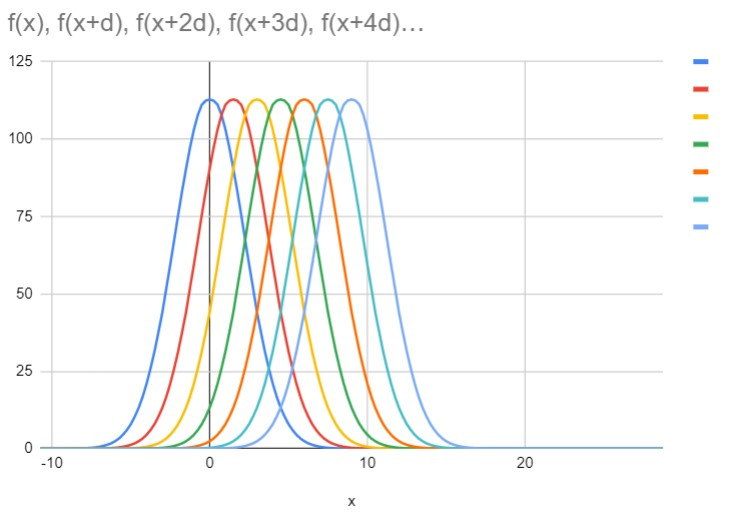